## <font color='PURPLE'>Integrantes</font> 


- Bobbio, Paula
- Cocio, Alex Federico
- Sammartino, Virginia


## <font color='PURPLE'>Introducción</font> 


El proyecto a continuación aborda la problemática de la *Criminalidad en la Ciudad Autónoma de Buenos Aires (CABA)* . 

Utilizamos como información principal los datasets ‘delitos_2016’, ‘delitos_2017’, ‘delitos_2018’, ‘delitos_2019’ extraídos de la página oficial del  GCBA https://data.buenosaires.gob.ar/ que detallan fecha, franja horaria, tipo de delito, barrio y ubicación exacta de los mismo.

Seleccionadas las intersecciones de calles de la ciudad con el objetivo de predecir la ocurrencia de delitos. Han sido tomados e cuenta tanto el recuento histórico de crímenes como el historial meteorológico, densidad poblacional, presupuesto destinado a la seguridad de la ciudad y ubicación de comisarias, locales bailables, alojamientos turísticos y  estaciones de transporte público.


El trabajo contó con una primea instancia de análisis exploratorio de los dataset y una posterior aplicación de modelos de predicción tales como Regresión lineal múltiple, Naive Bayes Gaussiano, K - Nearest Neighbors y Regresión Logística.

+ Datasets Delitos 2016-2019:
https://data.buenosaires.gob.ar/dataset/delitos

+ Dataset Densidad Poblacional:
https://data.buenosaires.gob.ar/dataset/estructura-poblacion

+ Dataset Presupuesto Ejecutado:
https://data.buenosaires.gob.ar/dataset/presupuesto-ejecutado

+ Dataset Comisarías:
https://data.buenosaires.gob.ar/dataset/comisarias-policia-ciudad

+ Dataset Locales Bailables:
https://data.buenosaires.gob.ar/dataset/locales-bailables

+ Dataset Alojamientos Turísticos:
https://data.buenosaires.gob.ar/dataset/alojamientos-turisticos

+ Dataset Histórico Meteorológico:
http://infometeoba.blogspot.com/

+ Dataset encuesta anual de hogares:
https://data.buenosaires.gob.ar/dataset/encuesta-anual-hogares

+ Dataset Estaciones de Subte:
https://data.buenosaires.gob.ar/dataset/encuesta-anual-hogares

+ Dataset Estaciones de Metrobus:
https://data.buenosaires.gob.ar/dataset/metrobus

+ Dataset Paradas de Coletivos:
https://data.buenosaires.gob.ar/dataset/colectivos-paradas

+ Dataset Barrios Populares
https://data.buenosaires.gob.ar/dataset/barrios-populares

+ Dataset Cajeros Automáticos
https://data.buenosaires.gob.ar/dataset/barrios-populares

+ Dataset Lugares Culto
https://data.buenosaires.gob.ar/dataset/lugares-culto

+ Dataset Polideportivos
https://data.buenosaires.gob.ar/dataset/polideportivos





## <font color='PURPLE'>Principales bibliotecas</font> 


In [1]:
# Importamos las librerías que vamos a usar en la notebook

import numpy as np
import pandas as pd
import geopy.distance as distance

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import osmnx as ox
import networkx as nx
ox.config(log_console=True)

import requests
import matplotlib.cm as cm
import matplotlib.colors as colors

### <font color='GREEN'>DELITOS</font> 

## <font color='PURPLE'>Importación de datos</font> 


In [7]:
delitos2016 = pd.read_csv('../Data/delitos_2016.csv')
delitos2017 = pd.read_csv('../Data/delitos_2017.csv')
delitos2018 = pd.read_csv('../Data/delitos_2018.csv')
delitos2019 = pd.read_csv('../Data/delitos_2019.csv')

C:\Users\Lucia Sammartino\.conda\envs\dhdsblend\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## <font color='PURPLE'>Limpieza de datos</font> 


##### <font color='GREY'>ESTRUCTURA GENEAL</font> 

In [8]:
# Resumen breve de cada df

print('Delitos 2016')
print(delitos2016.info(),'\n\n')
print('Delitos 2017')
print(delitos2017.info(),'\n\n')
print('Delitos 2018')
print(delitos2018.info(),'\n\n')
print('Delitos 2019')
print(delitos2019.info())

Delitos 2016
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126583 entries, 0 to 126582
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   126583 non-null  int64  
 1   fecha                126583 non-null  object 
 2   franja_horaria       126583 non-null  object 
 3   tipo_delito          126583 non-null  object 
 4   subtipo_delito       18789 non-null   object 
 5   cantidad_registrada  126583 non-null  float64
 6   comuna               125957 non-null  float64
 7   barrio               125957 non-null  object 
 8   lat                  125957 non-null  float64
 9   long                 125957 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 9.7+ MB
None 


Delitos 2017
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120564 entries, 0 to 120563
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------        

In [9]:
# Generamos un dataframe con las columnas de cada una de ellas.

delitos_columns = pd.DataFrame([delitos2016.columns, delitos2017.columns, delitos2018.columns, 
                                delitos2019.columns], index=['2016','2017','2018','2019'])
delitos_columns

,0,1,2,3,4,5,6,7,8,9
2016,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
2017,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
2018,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
2019,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long


In [10]:
# Agregamos el dato del año para cada dataframe.

delitos2016['Año'] = 2016
delitos2017['Año'] = 2017
delitos2018['Año'] = 2018
delitos2019['Año'] = 2019

In [11]:
# Vemos cómo se ven los datasets de cada año

delitos2016.sample(1)


,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long,Año
83952,86577,2016-09-01,22,Robo (con violencia),NaN,1.0,6.0,Caballito,-34.624545,-58.436239,2016


In [12]:
delitos2017.sample(1)

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long,Año
54532,172919,2017-06-14,16,Lesiones,Siniestro Vial,1.0,4.0,Barracas,-34.63078,-58.371957,2017


In [13]:
delitos2018.sample(1)

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long,Año
51992,370767,2018-06-04,8,Robo (con violencia),NaN,1.0,13.0,Belgrano,-34.558157,-58.446122,2018


In [14]:
delitos2019.sample(1)

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long,Año
119360,1031087,11-06-19,15,Robo (con violencia),NaN,NaN,6.0,Caballito,-34.626619,-58.44136,2019


In [15]:
# Observamos que los valores de "fecha" para el dataset de 2019 es distinto al resto, por lo que debemos modificarlo.

# Agregamos el año al principio y para todos los valores
fecha_full = '2019-'+ delitos2019.fecha

# Eliminamos la última parte
fecha_clean = fecha_full.str.replace('-19','')

# Reemplzamos la columna original por la serie que acabamos de crear
delitos2019['fecha'] = fecha_clean

delitos2019.sample(3)

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long,Año
121207,1035678,2019-12-10,23,Robo (con violencia),NaN,NaN,4.0,Barracas,-34.647142,-58.401541,2019
78424,1093362,2019-29-06,13,Robo (con violencia),NaN,NaN,1.0,Retiro,-34.598357,-58.378362,2019
17067,1080932,2019-25-10,17,Robo (con violencia),NaN,NaN,4.0,Nueva Pompeya,-34.655869,-58.402750,2019


In [16]:
# Armamos un dataset que reune los delitos de cada año.

delitos_A = pd.concat([delitos2016,delitos2017,delitos2018,delitos2019], ignore_index=True)
delitos_A.sample(5)

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long,Año
371701,1040937,2019-14-03,17,Robo (con violencia),NaN,NaN,11.0,Villa Devoto,-34.590323,-58.508829,2019
315121,327990,2018-07-25,16,Robo (con violencia),NaN,1.0,3.0,Balvanera,-34.611175,-58.404495,2018
94360,16757,2016-10-01,6,Hurto (sin violencia),Hurto Automotor,1.0,8.0,Villa Lugano,-34.679992,-58.479418,2016
433208,1090517,2019-28-07,1,Hurto (sin violencia),NaN,NaN,12.0,Villa Pueyrredón,-34.585999,-58.501884,2019
418064,993409,2019-18-03,6,Robo (con violencia),Robo Automotor,NaN,10.0,Floresta,-34.634760,-58.479786,2019


## <font color='PURPLE'>Tratamiento de valores nulos</font> 

In [17]:
# Vemos la cantidad de nulls por año

print('Porcentaje de nulos por columna:')
print(delitos_A.apply(lambda x: round(x.isnull().sum()/delitos_A.shape[0],2), axis=0))

delitos_A_nulls_df = pd.DataFrame({
             'id':delitos_A[delitos_A.id.isnull()].groupby('Año')['id'].size(),
             'tipo_delito':delitos_A[delitos_A.tipo_delito.isnull()].groupby('Año')['tipo_delito'].size(),         
             'subtipo_delito':delitos_A[delitos_A.subtipo_delito.isnull()].groupby('Año')['subtipo_delito'].size(),
             'cantidad_registrada':delitos_A[delitos_A.cantidad_registrada.isnull()].groupby('Año')['cantidad_registrada'].size(),
             'comuna':delitos_A[delitos_A.comuna.isnull()].groupby('Año')['comuna'].size(),
             'barrio':delitos_A[delitos_A.barrio.isnull()].groupby('Año')['barrio'].size(),
             'lat':delitos_A[delitos_A.lat.isnull()].groupby('Año')['lat'].size(),
             'long':delitos_A[delitos_A.long.isnull()].groupby('Año')['long'].size(),})

delitos_A_nulls_df['Subtotales'] = delitos_A_nulls_df.apply(lambda x: x.sum(), axis=1).astype(int)

delitos_A_nulls_df

Porcentaje de nulos por columna:
id                     0.00
fecha                  0.00
franja_horaria         0.00
tipo_delito            0.00
subtipo_delito         0.87
cantidad_registrada    0.23
comuna                 0.02
barrio                 0.02
lat                    0.02
long                   0.02
Año                    0.00
dtype: float64


,id,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long,Subtotales
Año,,,,,,,,,
2016,NaN,NaN,107794,NaN,626,626,626,626,110298
2017,NaN,NaN,100936,NaN,1841,1841,1841,1841,108300
2018,NaN,NaN,104649,NaN,5300,5300,5300,5300,125849
2019,NaN,NaN,116209,112180.0,692,692,692,692,231157


In [18]:
#Vemos si las observaciones con nulls de 'comuna' también tiene nulls en otras columnas que pueden ayudar a completarla

print(all(delitos_A[delitos_A.comuna.isnull()].index == delitos_A[delitos_A.barrio.isnull()].index))
print(all(delitos_A[delitos_A.comuna.isnull()].index == delitos_A[delitos_A.lat.isnull()].index))
print(all(delitos_A[delitos_A.comuna.isnull()].index == delitos_A[delitos_A.long.isnull()].index))

True
True
True


Notamos que las observaciones que no tienen un valor definido para "Comuna" tampoco lo tienen para "Barrio" ni para las coordenadas. Dada esa dificultad para una correcta imputación de valores y sumado al hecho de que representan un cantidad muy baja del total de observaciones, decidimos eliminarlas. 

In [19]:
delitos_A.dropna(subset=['comuna'], axis=0, inplace=True)

In [20]:
# Volvemos a ver la cantidad de nulls por año

print('Porcentaje de nulos por columna:')
print(delitos_A.apply(lambda x: round(x.isnull().sum()/delitos_A.shape[0],2), axis=0))

delitos_A_nulls_df = pd.DataFrame({
             'id':delitos_A[delitos_A.id.isnull()].groupby('Año')['id'].size(),
             'tipo_delito':delitos_A[delitos_A.tipo_delito.isnull()].groupby('Año')['tipo_delito'].size(),         
             'subtipo_delito':delitos_A[delitos_A.subtipo_delito.isnull()].groupby('Año')['subtipo_delito'].size(),
             'cantidad_registrada':delitos_A[delitos_A.cantidad_registrada.isnull()].groupby('Año')['cantidad_registrada'].size(),
             'comuna':delitos_A[delitos_A.comuna.isnull()].groupby('Año')['comuna'].size(),
             'barrio':delitos_A[delitos_A.barrio.isnull()].groupby('Año')['barrio'].size(),
             'lat':delitos_A[delitos_A.lat.isnull()].groupby('Año')['lat'].size(),
             'long':delitos_A[delitos_A.long.isnull()].groupby('Año')['long'].size(),})

delitos_A_nulls_df['Subtotales'] = delitos_A_nulls_df.apply(lambda x: x.sum(), axis=1).astype(int)

delitos_A_nulls_df

Porcentaje de nulos por columna:
id                     0.00
fecha                  0.00
franja_horaria         0.00
tipo_delito            0.00
subtipo_delito         0.87
cantidad_registrada    0.23
comuna                 0.00
barrio                 0.00
lat                    0.00
long                   0.00
Año                    0.00
dtype: float64


,id,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long,Subtotales
Año,,,,,,,,,
2016,NaN,NaN,107456,NaN,NaN,NaN,NaN,NaN,107456
2017,NaN,NaN,99222,NaN,NaN,NaN,NaN,NaN,99222
2018,NaN,NaN,101796,NaN,NaN,NaN,NaN,NaN,101796
2019,NaN,NaN,115519,112003.0,NaN,NaN,NaN,NaN,227522


In [21]:
# Vemos los valores que puede tomar "subtipo delito" (agrupado por "tipo delito")

delitos_A.groupby(['tipo_delito','subtipo_delito']).size()

tipo_delito            subtipo_delito 
Homicidio              Doloso               499
                       Siniestro Vial       496
Hurto (sin violencia)  Hurto Automotor    22447
Lesiones               Siniestro Vial     26412
Robo (con violencia)   Robo Automotor     11058
dtype: int64

Asumiendo que los delitos relacionados con siniestros viales 🚗 y lesiones responden a patrones muy distintos en comparación al resto de los delitos, excluiremos esas observaciones.

In [22]:
# Como todas las "lesiones" corresponden a "siniestros viales", con eliminar estas últimas es suficiente 

mask_siniestro_vial = delitos_A.subtipo_delito == 'Siniestro Vial'

delitos_B = delitos_A.drop(index = delitos_A[mask_siniestro_vial].index)

delitos_B.groupby(['tipo_delito','subtipo_delito']).size()

tipo_delito            subtipo_delito 
Homicidio              Doloso               499
Hurto (sin violencia)  Hurto Automotor    22447
Robo (con violencia)   Robo Automotor     11058
dtype: int64

In [23]:
# Ahora vemos en particular los valores que toma "subtipo delito"

delitos_B.subtipo_delito.value_counts(dropna=False, normalize=True).round(2)

NaN                0.93
Hurto Automotor    0.05
Robo Automotor     0.02
Doloso             0.00
Name: subtipo_delito, dtype: float64

Al ser tanta la cantidad de valores nulos de la columna *subtipo_delito* optamos por deshacernos de ella.

In [24]:
delitos_B.drop(columns='subtipo_delito', inplace=True)

In [25]:
# Vemos por último los valores que puede tomar "cantidad registrada"

delitos_B.cantidad_registrada.value_counts(dropna=False, normalize=True).round(4)

1.0     0.7528
NaN     0.2445
2.0     0.0021
3.0     0.0004
4.0     0.0001
5.0     0.0000
6.0     0.0000
8.0     0.0000
10.0    0.0000
16.0    0.0000
Name: cantidad_registrada, dtype: float64

In [26]:
print('Proporción de valores de "cantidad_registrada" distintos a 1 y no nulos:',
      round(delitos_B.loc[(delitos_A.cantidad_registrada != 1) & (delitos_B.cantidad_registrada.notnull()) ,:].size/delitos_B.cantidad_registrada.size,4))

Proporción de valores de "cantidad_registrada" distintos a 1 y no nulos: 0.0265



La columna "cantidad_registrada" refleja el número de delitos ocurridos en una localización (lat,long) y franja horaria determinada. Dado que para muy pocos casos (2,7%) el valor es mayor a 1, todas las observaciones (incluidos los nulos) serán tratados como 1.

Como consecuencia, si todos los valores pasan a ser iguales la columna en general pasa a ser intrascendente, por lo que decidimos directamente eliminarla.

In [27]:
# En un nuevo dataframe, eliminamos la columna "cantidad registrada"

delitos_C = delitos_B.drop(columns='cantidad_registrada')


In [28]:
delitos_C.to_csv('delito_C.csv')

In [29]:
# Eliminamos también la columna identificatoria de cada observación ya que es irrelevante. 
# Lo mismo con "barrio". Vamos a enfocarnos en las comunas

delitos_C.drop(columns=['id'], inplace=True)

In [30]:
# Visaulizamos los formatos de cada columna

delitos_C.dtypes

fecha              object
franja_horaria     object
tipo_delito        object
comuna            float64
barrio             object
lat               float64
long              float64
Año                 int64
dtype: object

In [57]:
# Generamos una serie que indica el día de la semana para cada fecha
# Los valores van de 0 (lunes) a 6 (domingo)
date_series = pd.date_range('2016-01-01', '2019-12-31', freq='D').to_series()
date_df = pd.DataFrame({'dia_de_la_semana':date_series.dt.dayofweek})
date_df.reset_index(inplace=True)
date_df.rename(columns={'index':'fecha'}, inplace=True)
date_df

,fecha,dia_de_la_semana
0,2016-01-01,4
1,2016-01-02,5
2,2016-01-03,6
3,2016-01-04,0
4,2016-01-05,1
...,...,...
1456,2019-12-27,4
1457,2019-12-28,5
1458,2019-12-29,6
1459,2019-12-30,0


In [58]:
date_df['fecha'] = date_df.fecha.astype(str)
date_df['fecha'] = date_df.fecha.astype(object)

In [59]:
delitos_D = pd.merge(delitos_C, date_df)
delitos_D.sample(3)

,fecha,franja_horaria,tipo_delito,comuna,barrio,lat,long,Año,dia_de_la_semana
7443,2016-01-26,13,Robo (con violencia),3.0,Balvanera,-34.606625,-58.395627,2016,1
246209,2018-03-10,17,Robo (con violencia),15.0,Chacarita,-34.586098,-58.442428,2018,5
249674,2018-03-21,12,Hurto (sin violencia),8.0,Villa Lugano,-34.683127,-58.481214,2018,2


In [60]:
# Cambiamos el formato de la columna "comuna" 
delitos_C['comuna'] = delitos_C.comuna.astype('int64')

In [61]:
# Visaulizamos nuevamente los formatos de cada columna

delitos_C.dtypes

fecha              object
franja_horaria     object
tipo_delito        object
comuna              int64
barrio             object
lat               float64
long              float64
Año                 int64
dtype: object

In [62]:
delitos_C['barrio'] = delitos_C.barrio.astype('str')

In [63]:
#Obseramos como queda e df al momento 
delitos_C.sample(3)

,fecha,franja_horaria,tipo_delito,comuna,barrio,lat,long,Año
235976,2017-11-28,9,Hurto (sin violencia),11,Villa Devoto,-34.607693,-58.518444,2017
232276,2017-11-18,17,Hurto (sin violencia),3,San Cristóbal,-34.622645,-58.393879,2017
60163,2016-06-25,10,Robo (con violencia),5,Almagro,-34.599410,-58.413297,2016


## <font color='PURPLE'>Asociando esquina con delito </font> 


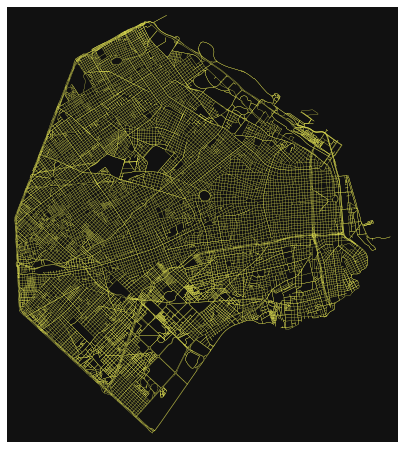

In [64]:
#Descargamos una red de calles de la CABA para poder visualizarla

G = ox.graph_from_place('Ciudad Autonoma de Buenos Aires', network_type='drive')
fig, ax = ox.plot_graph(G, node_size=0, edge_color='#FFFF5C', edge_linewidth=0.25)

In [65]:
#Identificamos cada esquina de la ciudad 
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G, nodes=True)
gdf_nodes.head(3)

,y,x,highway,street_count,ref,geometry
osmid,,,,,,
32375714,-34.546635,-58.493029,motorway_junction,3,NaN,POINT (-58.49303 -34.54664)
32375722,-34.566185,-58.507749,motorway_junction,3,NaN,POINT (-58.50775 -34.56619)
32376375,-34.653080,-58.528650,NaN,3,NaN,POINT (-58.52865 -34.65308)


In [66]:
gdf_edges.sample(3)

,,,osmid,bridge,oneway,lanes,highway,length,maxspeed,geometry,ref,name,tunnel,width,junction,access,service
u,v,key,,,,,,,,,,,,,,,
315080026,89351982,0,165274034,NaN,True,NaN,residential,63.376,40,"LINESTRING (-58.49234 -34.59034, -58.49290 -34...",NaN,Pedro Morán,NaN,NaN,NaN,NaN,NaN
3077545862,81541128,0,451189788,NaN,False,NaN,tertiary,175.610,60,"LINESTRING (-58.46638 -34.59991, -58.46568 -34...",NaN,Avenida Teniente General Donato Álvarez,NaN,NaN,NaN,NaN,NaN
191211231,191173102,0,10426273,NaN,True,1,residential,132.138,40,"LINESTRING (-58.43319 -34.59477, -58.43230 -34...",NaN,Jufré,NaN,NaN,NaN,NaN,NaN


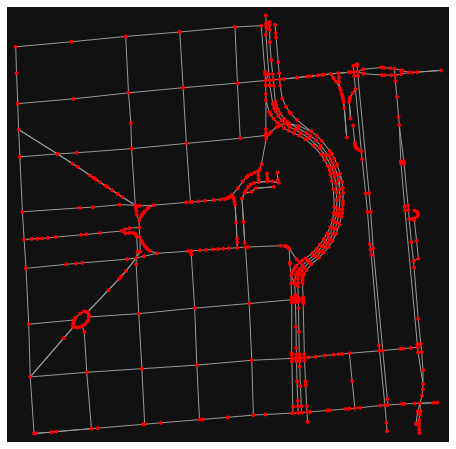

In [67]:
#Vemos cómo el algoritmo simplifica la identificaición de esquinas. Ejemplificamos las coordenada de la plaza de Mayo

location_point = (-34.6083, -58.3712)
G_1 = ox.graph_from_point(location_point, network_type='drive_service', dist=500, simplify=False)
fig, ax = ox.plot_graph(G_1, node_color='r')

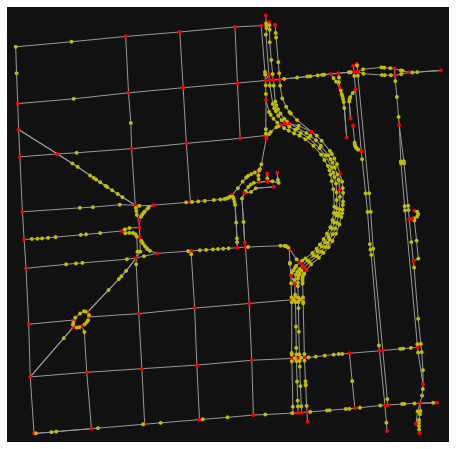

In [68]:
#Observamos que puntos eliinaría si somos más estrictos

nc = ['r' if ox.simplification._is_endpoint(G_1, node) else 'y' for node in G_1.nodes()]
fig, ax = ox.plot_graph(G_1 ,node_color=nc)

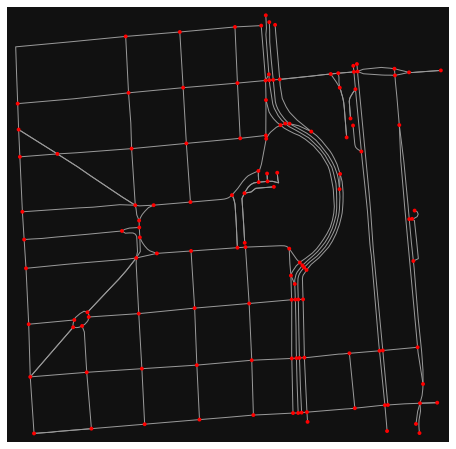

In [69]:
#Decidimos simplificar la red

G_1 = ox.simplify_graph(G_1)
fig, ax = ox.plot_graph(G_1, node_color='r')

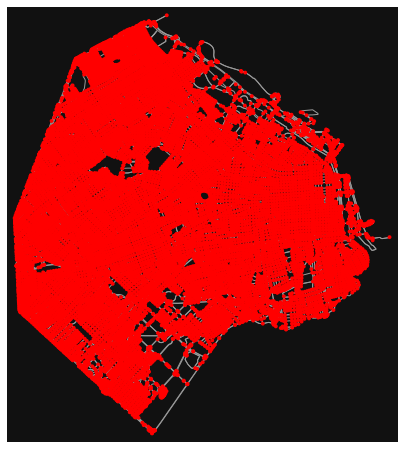

In [70]:
# Lo aplicamos a toda la ciudad

fig, ax = ox.plot_graph(G, node_color='r')

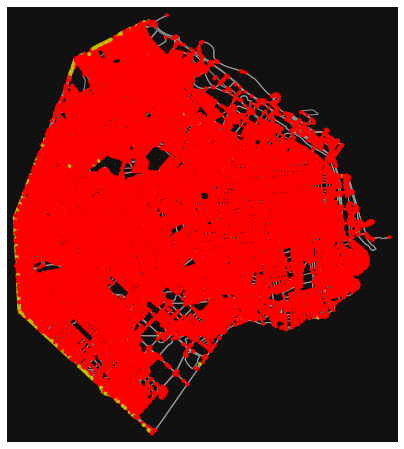

In [71]:
#Lo que se se ve en amarillo es lo que se elimina

nc = ['r' if ox.simplification._is_endpoint(G, node) else 'y' for node in G.nodes()]
fig, ax = ox.plot_graph(G ,node_color=nc)

In [72]:
# Aplicamos un citerio más estrico para simplificar esquinas 

G_proj = ox.project_graph(G)
intersections = ox.consolidate_intersections(G_proj, rebuild_graph=True, tolerance=50, dead_ends=False, reconnect_edges=True)
len(intersections)

5351

In [73]:
# Comparamos con el número original de esquinas 

len(G)

17679

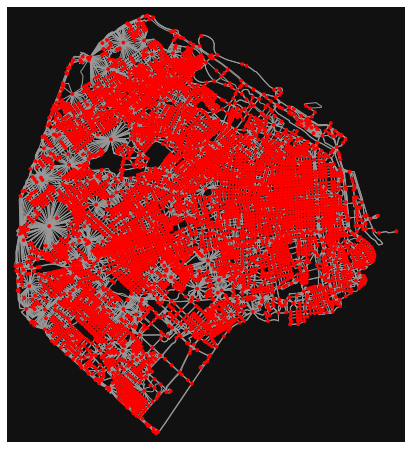

In [74]:
fig, ax = ox.plot_graph(intersections, node_color='r')

In [75]:
# Para cada delito ocurrido en una coordenada determinada, encontramos la esquina más cercana.

# REEMPLAZAR "G" POR "INTERSECTIONS" 

near_nodes = ox.distance.get_nearest_nodes(G, delitos_D['long'], delitos_D['lat'], method='kdtree')

In [76]:
near_nodes

array([239701509, 196253723, 232896609, ..., 241914817, 782795527,
       247879336], dtype=int64)

In [77]:
near_nodes.size

385143

In [78]:
new_series = pd.Series(near_nodes)
new_series

0         239701509
1         196253723
2         232896609
3         195978094
4          92616225
            ...    
385138     96131107
385139     89360474
385140    241914817
385141    782795527
385142    247879336
Length: 385143, dtype: int64

In [79]:
gdf_nodes.reset_index(inplace=True)
gdf_nodes.sample(3)

,osmid,y,x,highway,street_count,ref,geometry
11042,245493611,-34.615789,-58.478923,NaN,3,NaN,POINT (-58.47892 -34.61579)
10041,241895814,-34.541705,-58.480338,traffic_signals,4,NaN,POINT (-58.48034 -34.54171)
10523,242019667,-34.638242,-58.525868,NaN,3,NaN,POINT (-58.52587 -34.63824)


In [80]:
new_df = pd.DataFrame({'osmid':new_series})
new_df_1 = pd.merge(new_df, gdf_nodes, how='left')
new_df_1.drop(columns=['highway','street_count','ref','geometry'], inplace=True)
new_df_1.rename(columns={'y':'lat_y_geo','x':'long_x_geo'}, inplace=True)
new_df_1.sample(3)

,osmid,lat_y_geo,long_x_geo
296236,89184696,-34.638704,-58.421156
301201,98250608,-34.584843,-58.435397
207241,232637015,-34.640383,-58.481113


In [81]:
#Identificación de cada esquina, ubicación exacta por esquina y las coordenadas del delito

new_df_1['lat_y_delitos'] = delitos_D['lat']
new_df_1['long_x_delitos'] = delitos_D['long']
new_df_1.sample(3)

,osmid,lat_y_geo,long_x_geo,lat_y_delitos,long_x_delitos
323419,3422929108,-34.555440,-58.462446,-34.555482,-58.462534
151550,92583887,-34.563719,-58.452328,-34.563714,-58.452337
243821,199646032,-34.675985,-58.472664,-34.675993,-58.472692


In [82]:
#Observamos la distancia entre el delito y su esquia asociada. 

distance_eu = ox.distance.euclidean_dist_vec(new_df_1['lat_y_geo'], new_df_1['long_x_geo'], new_df_1['lat_y_delitos'], new_df_1['long_x_delitos'])
new_df_1['distancia'] = distance_eu
new_df_1.sample(3)

,osmid,lat_y_geo,long_x_geo,lat_y_delitos,long_x_delitos,distancia
339902,89271569,-34.575363,-58.508557,-34.575519,-58.508455,0.000187
222743,205501567,-34.623623,-58.378587,-34.624492,-58.379066,0.000992
34114,5384962268,-34.637423,-58.407584,-34.637058,-58.408214,0.000728


In [83]:
new_df_1.shape

(385143, 6)

In [84]:
delitos_D.shape

(385143, 9)

In [85]:
new_df_1.osmid.unique().size

16376

In [86]:
# Renombramos la columna 'osmid' como 'esquina_id'

new_df_1.rename(columns={'osmid':'esquina_id'}, inplace=True)
new_df_1.sample(3)

,esquina_id,lat_y_geo,long_x_geo,lat_y_delitos,long_x_delitos,distancia
179120,206106105,-34.627005,-58.384356,-34.627023,-58.384355,0.000018
18814,245566864,-34.558945,-58.488496,-34.558912,-58.488572,0.000083
348512,84564179,-34.575031,-58.471800,-34.575033,-58.471806,0.000006


In [87]:
list(new_df_1.index) == list(delitos_D.index)

True

In [88]:
new_df_1.columns

Index(['esquina_id', 'lat_y_geo', 'long_x_geo', 'lat_y_delitos',
       'long_x_delitos', 'distancia'],
      dtype='object')

In [89]:
delitos_D.columns

Index(['fecha', 'franja_horaria', 'tipo_delito', 'comuna', 'barrio', 'lat',
       'long', 'Año', 'dia_de_la_semana'],
      dtype='object')

In [90]:
#Sumamos esquina id, distancia y lat y lon geo al df

delitos_E = pd.merge(delitos_D, new_df_1.loc[:,['esquina_id','distancia','lat_y_geo','long_x_geo']], left_index=True, right_index=True)
delitos_E

,fecha,franja_horaria,tipo_delito,comuna,barrio,lat,long,Año,dia_de_la_semana,esquina_id,distancia,lat_y_geo,long_x_geo
0,2016-01-01,13,Robo (con violencia),9.0,Parque Avellaneda,-34.648730,-58.468536,2016,4,239701509,0.000400,-34.648865,-58.468160
1,2016-01-01,22,Robo (con violencia),14.0,Palermo,-34.576925,-58.407400,2016,4,196253723,0.000470,-34.577227,-58.407039
2,2016-01-01,19,Hurto (sin violencia),9.0,Parque Avellaneda,-34.655760,-58.478681,2016,4,232896609,0.000379,-34.655565,-58.479005
3,2016-01-01,4,Robo (con violencia),6.0,Caballito,-34.624128,-58.436826,2016,4,195978094,0.000738,-34.624565,-58.436231
4,2016-01-01,4,Robo (con violencia),14.0,Palermo,-34.579435,-58.410433,2016,4,92616225,0.000739,-34.579859,-58.409827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385138,2019-12-12,13,Robo (con violencia),13.0,Belgrano,-34.558935,-58.464884,2019,3,96131107,0.000005,-34.558932,-58.464880
385139,2019-12-12,9,Robo (con violencia),12.0,Coghlan,-34.557804,-58.474588,2019,3,89360474,0.000506,-34.558018,-58.475046
385140,2019-12-12,7,Robo (con violencia),12.0,Saavedra,-34.554440,-58.486521,2019,3,241914817,0.000293,-34.554218,-58.486712
385141,2019-12-12,23,Robo (con violencia),13.0,Nuñez,-34.549142,-58.454650,2019,3,782795527,0.000188,-34.548992,-58.454764


In [91]:
delitos_E.esquina_id.unique().size

16376

In [92]:
delitos_E.esquina_id.value_counts().describe().round(2)

#Multiplicamos por mil los delitos para que sean valores más interpetables

delitos_E['distancia'] = delitos_E['distancia']*10000
delitos_E.sample(3)

,fecha,franja_horaria,tipo_delito,comuna,barrio,lat,long,Año,dia_de_la_semana,esquina_id,distancia,lat_y_geo,long_x_geo
354750,2019-05-03,11,Robo (con violencia),4.0,Barracas,-34.637463,-58.371165,2019,4,206112011,4.066334,-34.637549,-58.371563
205195,2017-10-28,20,Hurto (sin violencia),2.0,Recoleta,-34.587839,-58.401995,2017,5,192015816,0.235376,-34.587861,-58.401987
66566,2016-07-29,19,Hurto (sin violencia),14.0,Palermo,-34.568340,-58.444305,2016,4,89319937,2.230631,-34.568156,-58.444431


In [93]:
delitos_E.distancia.describe().round(4)

count    385143.0000
mean          3.0885
std           2.9903
min           0.0000
25%           0.3704
50%           2.5572
75%           5.1320
max         115.8229
Name: distancia, dtype: float64

In [94]:
(delitos_E.distancia < 2.5572).value_counts()

False    192574
True     192569
Name: distancia, dtype: int64

In [95]:
#Creamos nuevo df y nos quedamos con delitos asociadas a esquinas cercanas 

mask_distance_to_delitos = delitos_E.distancia < 2.5572
delitos_F = delitos_E[mask_distance_to_delitos]
delitos_F.drop(['distancia'], axis=1)

delitos_F.sample(4)

,fecha,franja_horaria,tipo_delito,comuna,barrio,lat,long,Año,dia_de_la_semana,esquina_id,distancia,lat_y_geo,long_x_geo
339229,2019-01-10,17,Hurto (sin violencia),1.0,San Nicolás,-34.603302,-58.373629,2019,3,180516416,2.406493,-34.603226,-58.373857
335719,2018-12-29,20,Hurto (sin violencia),11.0,Villa del Parque,-34.605130,-58.479207,2018,5,199347378,0.317855,-34.605103,-58.479190
124058,2017-01-25,20,Robo (con violencia),8.0,Villa Lugano,-34.685576,-58.479626,2017,2,199588557,0.167431,-34.685589,-58.479636
257978,2018-04-18,20,Hurto (sin violencia),11.0,Villa Gral. Mitre,-34.608070,-58.475099,2018,2,199354794,0.235771,-34.608066,-58.475076


In [96]:
delitos_F.sample(1)

,fecha,franja_horaria,tipo_delito,comuna,barrio,lat,long,Año,dia_de_la_semana,esquina_id,distancia,lat_y_geo,long_x_geo
228791,2018-01-11,21,Hurto (sin violencia),3.0,San Cristóbal,-34.624285,-58.396135,2018,3,81552583,1.739342,-34.624313,-58.395963


In [97]:
Delitos = delitos_F
Delitos.sample(3)

,fecha,franja_horaria,tipo_delito,comuna,barrio,lat,long,Año,dia_de_la_semana,esquina_id,distancia,lat_y_geo,long_x_geo
297740,2018-09-01,12,Robo (con violencia),4.0,Parque Patricios,-34.641093,-58.404874,2018,5,206119225,0.089107,-34.641094,-58.404865
305776,2018-09-26,22,Robo (con violencia),3.0,Balvanera,-34.602542,-58.409796,2018,2,199476331,0.064031,-34.602542,-58.409802
338111,2019-01-06,22,Robo (con violencia),14.0,Palermo,-34.582962,-58.414118,2019,6,177127912,0.182000,-34.582944,-58.414118


In [98]:
Delitos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192569 entries, 8 to 385142
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fecha             192569 non-null  object 
 1   franja_horaria    192569 non-null  object 
 2   tipo_delito       192569 non-null  object 
 3   comuna            192569 non-null  float64
 4   barrio            192569 non-null  object 
 5   lat               192569 non-null  float64
 6   long              192569 non-null  float64
 7   Año               192569 non-null  int64  
 8   dia_de_la_semana  192569 non-null  int64  
 9   esquina_id        192569 non-null  int64  
 10  distancia         192569 non-null  float64
 11  lat_y_geo         192569 non-null  float64
 12  long_x_geo        192569 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 20.6+ MB


## <font color='PURPLE'>Análisis descriptivo</font>  
 

Observamos los 10 barrios con mayor cantidad de delitos.

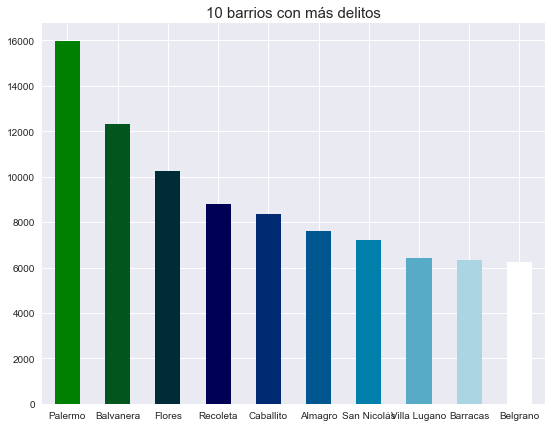

In [99]:
#plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.ocean(np.linspace(0, 1, 10))
delitos_F['barrio'].value_counts().head(10).plot.bar(color = color, figsize = (9,7))

plt.title('10 barrios con más delitos' ,fontsize = 15)

plt.xticks(rotation = 0)
plt.show()

Observamos cómo se distribuyen los delitos según su horario.

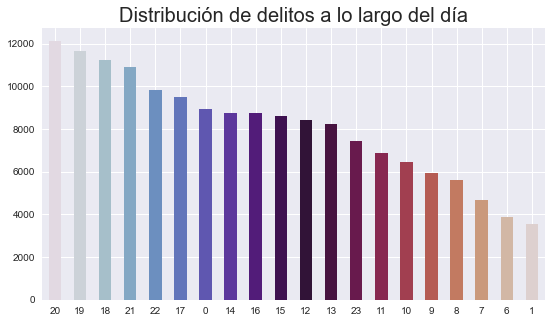

In [100]:
import warnings
warnings.filterwarnings('ignore')

color = plt.cm.twilight(np.linspace(0, 5, 100))
delitos_F['franja_horaria'].value_counts().head(20).plot.bar(color = color, figsize = (9, 5))

plt.title('Distribución de delitos a lo largo del día', fontsize = 20)
plt.xticks(rotation = 0)
plt.show()

In [101]:
# Generamos una serie que indica el día de la semana para cada fecha
# Los valores van de 0 (lunes) a 6 (domingo)
date_series = pd.date_range('2016-01-01', '2019-12-31', freq='D').to_series()
date_df = pd.DataFrame({'dia_de_la_semana':date_series.dt.dayofweek})
date_df.reset_index(inplace=True)
date_df.rename(columns={'index':'fecha'}, inplace=True)
date_df

,fecha,dia_de_la_semana
0,2016-01-01,4
1,2016-01-02,5
2,2016-01-03,6
3,2016-01-04,0
4,2016-01-05,1
...,...,...
1456,2019-12-27,4
1457,2019-12-28,5
1458,2019-12-29,6
1459,2019-12-30,0


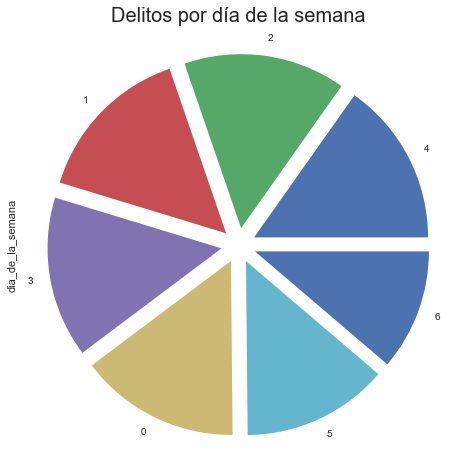

In [102]:

plt.style.use('seaborn')


delitos_D['dia_de_la_semana'].value_counts().head(15).plot.pie(figsize = (15, 8), explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

plt.title('Delitos por día de la semana',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

In [103]:
d = pd.date_range(start='2016-01-01', end='2019-12-31', freq='MS').to_series   
m_df = pd.DataFrame({'mes':date_series.dt.month})
m_df.reset_index(inplace=True)
m_df.rename(columns={'index':'fecha'}, inplace=True)
m_df

,fecha,mes
0,2016-01-01,1
1,2016-01-02,1
2,2016-01-03,1
3,2016-01-04,1
4,2016-01-05,1
...,...,...
1456,2019-12-27,12
1457,2019-12-28,12
1458,2019-12-29,12
1459,2019-12-30,12


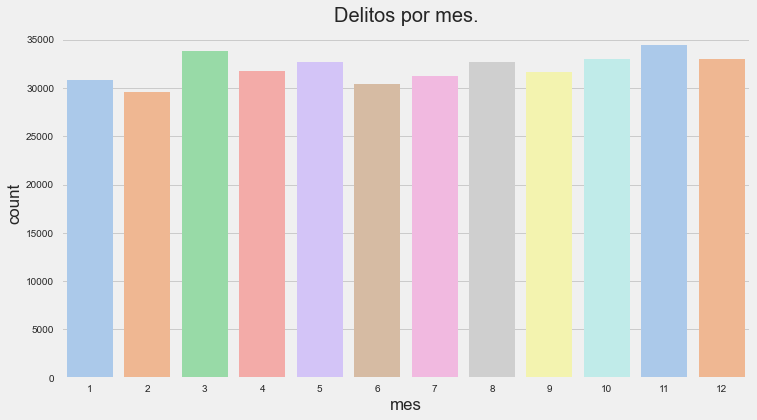

In [119]:
delitos_D['fecha'] = pd.to_datetime(delitos_D['fecha'])

delitos_D['mes'] = delitos_D['fecha'].dt.month

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11, 6)

sns.countplot(delitos_D['mes'], palette = 'pastel',)
plt.title('Delitos por mes.', fontsize = 20)

plt.show()